In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [15]:
data = np.genfromtxt('./Admission_Predict.csv', delimiter=',', skip_header=1)
X_train = np.array(data[:,1:7])
y_train= np.array(data[:,8])

In [16]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[50.   28.    4.    4.    4.    3.12]
Peak to Peak range by column in Normalized X:[4.36327014 4.61899697 3.50171452 3.97768808 4.45755089 5.23866806]


In [17]:
lmr = LinearRegression()
lmr.fit(X_norm, y_train)

LinearRegression()

In [18]:
b_norm = lmr.intercept_
w_norm = lmr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [ 0.02608231  0.01669112  0.00692464 -0.00197241  0.02041354  0.07139404], b:0.7243499999999998


In [19]:
# make a prediction using sgdr.predict()
y_pred_sgd = lmr.predict(X_norm)
print(f"Prediction on training set:\n{y_pred_sgd[:4]}" )
print(f"Target values \n{y_train[:4]}")

Prediction on training set:
[0.95266943 0.80027082 0.64266147 0.72942547]
Target values 
[0.92 0.76 0.72 0.8 ]


(3, 3)


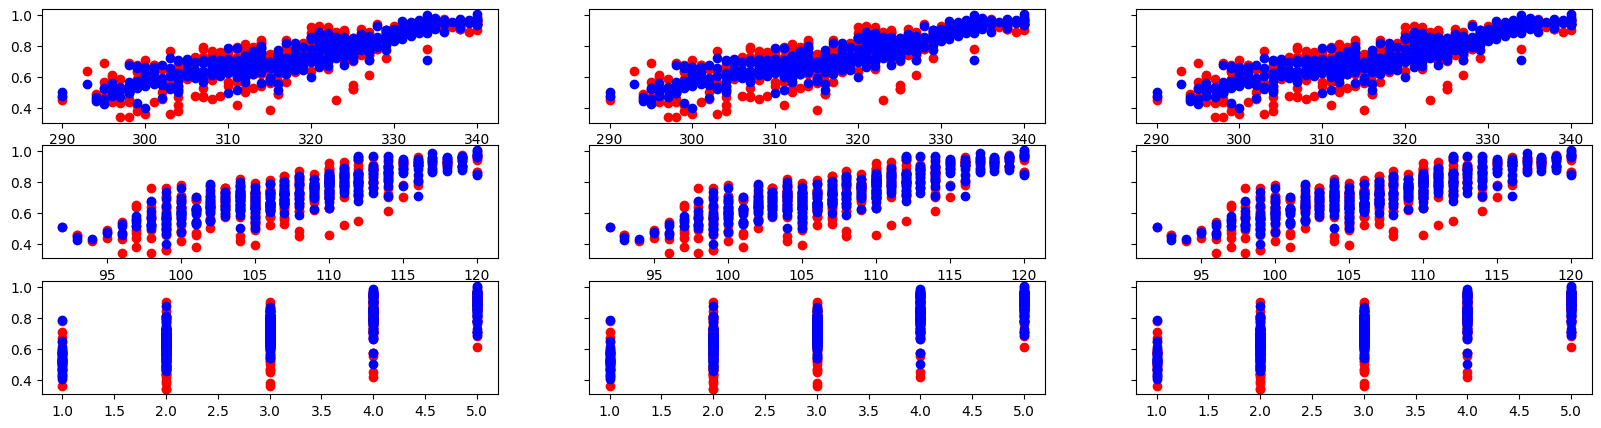

In [21]:
fig,ax=plt.subplots(3,3,figsize=(20,5),sharey=True)
print(ax.shape)
for i in range(ax.shape[1]):
    for j in range(ax.shape[0]):
        ax[i,j].scatter(X_train[:,i],y_train, label = 'target', c='r')
        # ax[i].set_xlabel(X_features[i])
        ax[i,j].scatter(X_train[:,i],y_pred_sgd,c='b', label = 'predict')
# ax[0].set_ylabel("Price"); ax[0].legend();
# fig.suptitle("target versus prediction using z-score normalized model")
plt.show()